In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

import os

# On commence par traiter le dossier des revues négatives

directory = 'neg'

# On crée ensuite une fonction pour créer un dataframe à une seule ligne à partir d'un fichier texte

def convert_to_df(path):
    df = pd.read_csv(path,delimiter="  ", header=None)
    df = pd.DataFrame({0: [', '.join(df[0].str.strip('"').tolist())]})
    return df

# Frames est une liste contenant tous les dataframes à rassembler
frames=[]

# On applique la fonction à tous les fichiers textes du dossier en rajoutant chaque dataframe créé à la liste 'frames'
for file in os.listdir(directory):
    df=convert_to_df(directory+"\\"+file)
    frames.append(df)

# Le dataframe final pour toutes les revues négatives est la concaténation de tous les dataframes contenus dans 'frames'
df_final_n = pd.concat(frames)

# On rajoute la colonne 'sentiment' à laquelle on assigne la valeur 0 pour une revue négative
df_final_n.loc[:,'sentiment'] = [0 for i in range(1000)]

df_final_n.head()







C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_9636\2380797652.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="  ", header=None)
C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_9636\2380797652.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="  ", header=None)
C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_9636\2380797652.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can

,0,sentiment
0,"plot : two teen couples go to a church party ,...",0
0,"the happy bastard's quick movie review, damn t...",0
0,it is movies like these that make a jaded movi...,0
0,"quest for camelot "" is warner bros . ' first ...",0
0,synopsis : a mentally unstable man undergoing ...,0


In [33]:
directory = 'pos'

# On procède de même avec le dossier des revues positives
def convert_to_df(path):
    df = pd.read_csv(path,delimiter="  ", header=None)
    df = pd.DataFrame({0: [', '.join(df[0].str.strip('"').tolist())]})
    return df
frames=[]

for file in os.listdir(directory):
    df=convert_to_df(directory+"\\"+file)
    frames.append(df)

df_final_p = pd.concat(frames)

df_final_p.loc[:,'sentiment'] = [1 for i in range(1000)]    



df_final_p.head()

C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_9636\2721101991.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="  ", header=None)
C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_9636\2721101991.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="  ", header=None)
C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_9636\2721101991.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can av

,0,sentiment
0,films adapted from comic books have had plenty...,1
0,every now and then a movie comes along from a ...,1
0,you've got mail works alot better than it dese...,1
0,"jaws "" is a rare film that grabs your attenti...",1
0,moviemaking is a lot like being the general ma...,1


In [34]:
# On rassemble les deux dataframes dans un seul dataframe

df_final_pn=pd.concat([df_final_n,df_final_p])

df_final_pn.head()

,0,sentiment
0,"plot : two teen couples go to a church party ,...",0
0,"the happy bastard's quick movie review, damn t...",0
0,it is movies like these that make a jaded movi...,0
0,"quest for camelot "" is warner bros . ' first ...",0
0,synopsis : a mentally unstable man undergoing ...,0


In [35]:
# On mélange le dataframe 

df_final_pn = df_final_pn.sample(frac=1)
df_final_pn.head()

,0,sentiment
0,"hollywood is a pimp ., a fat , cigar-smoking c...",1
0,"over 40 years ago , a japanese production comp...",0
0,"ladybugs "" is a typical comedy that relies on...",0
0,supposedly based on a true story in which the ...,0
0,"living out loud , "" is the type of motion pic...",1


In [36]:
# On nomme le colonne 'review'

df_final_pn = df_final_pn.rename(columns={0:'review'})

df_final_pn.head()

,review,sentiment
0,"hollywood is a pimp ., a fat , cigar-smoking c...",1
0,"over 40 years ago , a japanese production comp...",0
0,"ladybugs "" is a typical comedy that relies on...",0
0,supposedly based on a true story in which the ...,0
0,"living out loud , "" is the type of motion pic...",1


In [37]:
# On place l'index

df_final_pn = df_final_pn.set_index(pd.Index([i for i in range(2000)]))


In [38]:
df_final_pn.head(10)

,review,sentiment
0,"hollywood is a pimp ., a fat , cigar-smoking c...",1
1,"over 40 years ago , a japanese production comp...",0
2,"ladybugs "" is a typical comedy that relies on...",0
3,supposedly based on a true story in which the ...,0
4,"living out loud , "" is the type of motion pic...",1
5,"georges polti once wrote a paper called "" the ...",0
6,"not so long ago , men by the names of peckinpa...",0
7,"an 18-foot-high , 43-foot-long dragon is the c...",0
8,woody allen is one of the most successful arti...,0
9,on seeing the outrageous previews for bulworth...,1


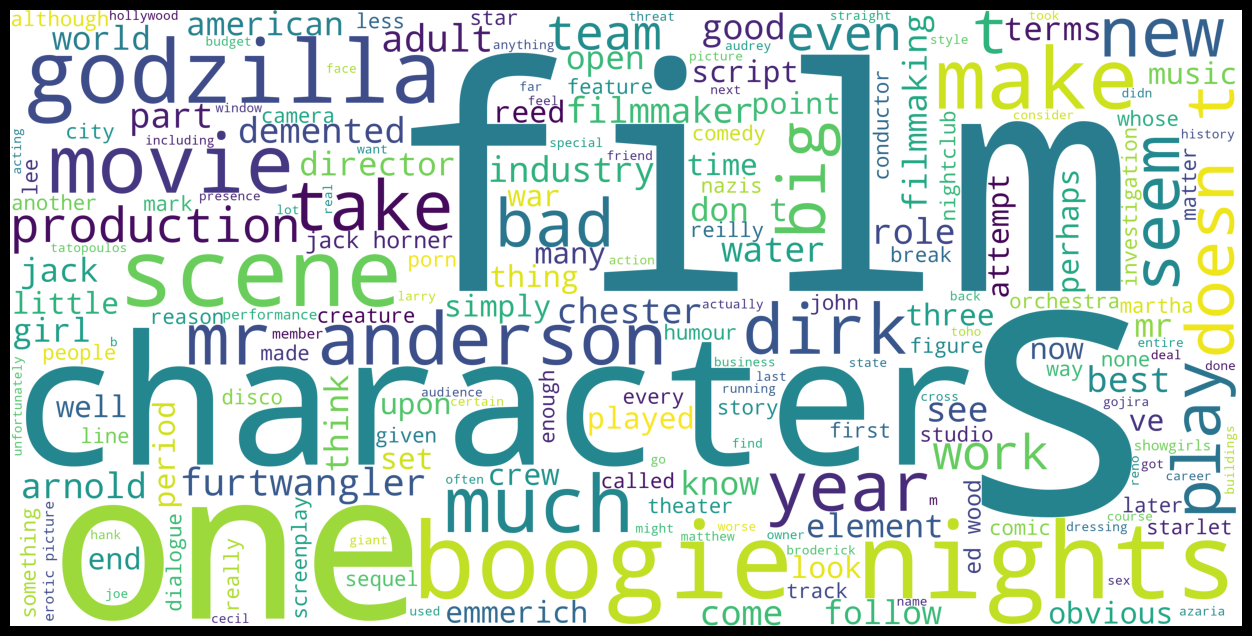

In [39]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


action = df_final_pn[df_final_pn['review'] == True]
action_text = df_final_pn['review'].values

wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(str(action_text))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [40]:
import string

exclude = set(string.punctuation)
def remove_punctuation(row):
    row.review = ''.join(ch for ch in row.review if ch not in exclude)
    return row
df_final_pn = df_final_pn.apply(remove_punctuation, axis = 1)

In [41]:
from nltk.corpus import stopwords 

stop = stopwords.words("english")

df_final_pn['review'] = df_final_pn['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

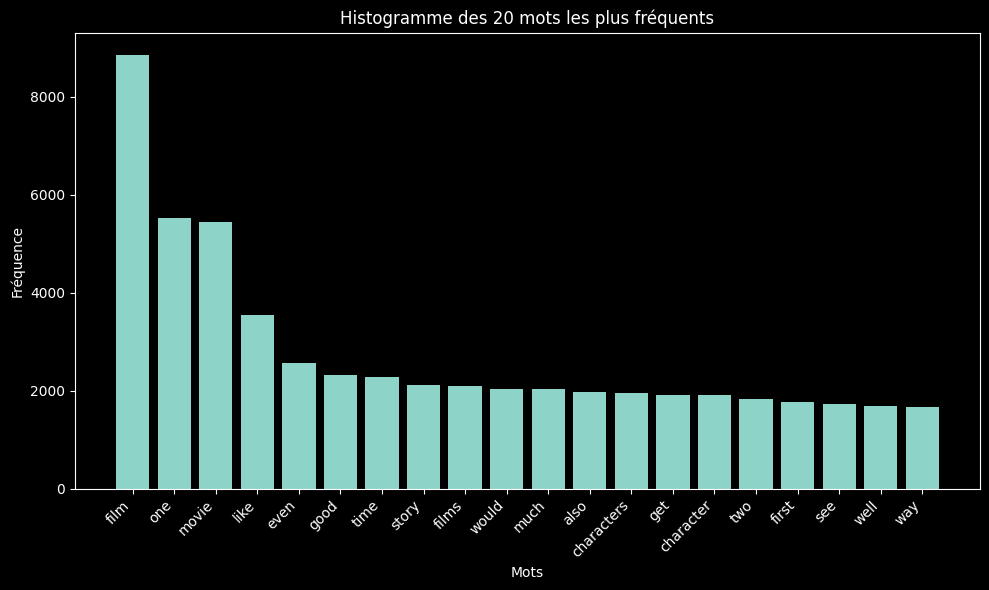

In [42]:
cv = CountVectorizer()

X = cv.fit_transform(df_final_pn['review'])

feature_names = cv.get_feature_names_out()
word_freq = X.sum(axis=0)
word_freq_dict = {word: freq for word, freq in zip(feature_names, word_freq.tolist()[0])}


sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)
sorted_words = [item[0] for item in sorted_word_freq]
sorted_freqs = [item[1] for item in sorted_word_freq]


top_words = sorted_words[:20]
top_freqs = sorted_freqs[:20]

plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_freqs)
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Histogramme des 20 mots les plus fréquents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
# On retire certains mots très fréquent mais n'apportant rien à la classification 

df_final_pn['review'] = df_final_pn['review'].str.replace('film','')
df_final_pn['review'] = df_final_pn['review'].str.replace('movie','')
df_final_pn['review'] = df_final_pn['review'].str.replace('one','')

In [44]:
df_final_pn.review[124]

'may heard lucas might think much probably stars corey haim maybe little geek collects insects maybe doesnt feature slick liners chart topping soundtrack albums almost requirement teen s 80s however missing true masterpeice best  1986 best  adolescent life ever made corey haim stars lucas bligh tiny 14 year old scruffy hair thick glasses interest insects outdoor life  day stops tennis courts sees must angel name maggie 16 year old certainly beauty lovely red hair sweet innocent complexion maggie seems little disturbed little kid watching somehow interests soon talking getting know  another gradually become good friends spend summer together various things studying insects namely locusts come hiding every 17 years playing tennis listening symphony orchestra manhole cover lucas obviously love maggie charmed clear would never consider anything good friend clear lucas however still beleives maggie soulmate dreads impending start school knows whats happen soon find painful scene lucas humil

In [45]:
# On lemmatise les mots
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
df_final_pn['review'] = df_final_pn['review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df_final_pn.review[124]

[nltk_data] Downloading package wordnet to C:\Users\Mohamed-
[nltk_data]     Lemine\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Mohamed-
[nltk_data]     Lemine\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'may heard lucas might think much probably star corey haim maybe little geek collect insect maybe doesnt feature slick liner chart topping soundtrack album almost requirement teen s 80 however missing true masterpeice best 1986 best adolescent life ever made corey haim star lucas bligh tiny 14 year old scruffy hair thick glass interest insect outdoor life day stop tennis court see must angel name maggie 16 year old certainly beauty lovely red hair sweet innocent complexion maggie seems little disturbed little kid watching somehow interest soon talking getting know another gradually become good friend spend summer together various thing studying insect namely locust come hiding every 17 year playing tennis listening symphony orchestra manhole cover lucas obviously love maggie charmed clear would never consider anything good friend clear lucas however still beleives maggie soulmate dread impending start school know whats happen soon find painful scene lucas humiliated jock pep rally thro

In [46]:
# On essaye le stemming également
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
df_final_pn['review_stemming'] = df_final_pn['review'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
df_final_pn.review_stemming[124]

'may heard luca might think much probabl star corey haim mayb littl geek collect insect mayb doesnt featur slick liner chart top soundtrack album almost requir teen s 80 howev miss true masterpeic best 1986 best adolesc life ever made corey haim star luca bligh tini 14 year old scruffi hair thick glass interest insect outdoor life day stop tenni court see must angel name maggi 16 year old certainli beauti love red hair sweet innoc complexion maggi seem littl disturb littl kid watch somehow interest soon talk get know anoth gradual becom good friend spend summer togeth variou thing studi insect name locust come hide everi 17 year play tenni listen symphoni orchestra manhol cover luca obvious love maggi charm clear would never consid anyth good friend clear luca howev still beleiv maggi soulmat dread impend start school know what happen soon find pain scene luca humili jock pep ralli throw stage right front belov maggi surprisingli turn tabl jock clown around take far embarass front enti

In [47]:
# Conversion des mots en vecteurs

X = cv.fit_transform(df_final_pn['review'])
y = df_final_pn['sentiment']


In [48]:
print(np.shape(X))
print(X[15])

(2000, 42043)
  (0, 64)	1
  (0, 2453)	1
  (0, 35359)	1
  (0, 25123)	1
  (0, 36778)	1
  (0, 33080)	4
  (0, 37308)	2
  (0, 24388)	1
  (0, 41473)	1
  (0, 22631)	1
  (0, 10796)	1
  (0, 37434)	1
  (0, 40581)	1
  (0, 38695)	1
  (0, 13301)	1
  (0, 15494)	2
  (0, 8466)	1
  (0, 10197)	2
  (0, 28015)	1
  (0, 30025)	1
  (0, 20433)	1
  (0, 15614)	2
  (0, 20303)	1
  (0, 34676)	1
  (0, 2153)	1
  :	:
  (0, 34747)	1
  (0, 1000)	1
  (0, 949)	1
  (0, 34134)	1
  (0, 31098)	1
  (0, 37721)	1
  (0, 38121)	1
  (0, 37588)	1
  (0, 21799)	1
  (0, 12688)	1
  (0, 18774)	1
  (0, 3735)	1
  (0, 40995)	1
  (0, 15020)	1
  (0, 41477)	1
  (0, 7830)	1
  (0, 4681)	1
  (0, 35990)	1
  (0, 9548)	1
  (0, 17350)	1
  (0, 19051)	1
  (0, 8032)	1
  (0, 2377)	1
  (0, 24902)	1
  (0, 36123)	1


In [49]:
# On crée un sac de mots après le stemming
cv_stemming = CountVectorizer()
X_stemming = cv_stemming.fit_transform(df_final_pn['review_stemming'])
y_stemming = df_final_pn['sentiment']



In [50]:
# On crée un modèle tf-idf après la lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df_final_pn['review'])
y_tfidf = df_final_pn['sentiment']




In [51]:
# On crée un modèle tf-idf après le stemming
tfidf_stemming = TfidfVectorizer()
X_tfidf_stemming = tfidf_stemming.fit_transform(df_final_pn['review_stemming'])
y_tfidf_stemming = df_final_pn['sentiment']



In [52]:
# On sépare les donneés en test set et train set, Le pourcentage idéal semble être 20% de test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #lemmatization
X_train_stemming, X_test_stemming, y_train_stemming, y_test_stemming = train_test_split(X_stemming, y_stemming, test_size=0.2, random_state=101) #stemming

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=101) #tfidf lemmatization
X_train_tfidf_stemming, X_test_tfidf_stemming, y_train_tfidf_stemming, y_test_tfidf_stemming = train_test_split(X_tfidf_stemming, y_tfidf_stemming, test_size=0.2, random_state=101) #tfidf stemming

In [53]:
print(np.shape(X_train))
print(np.shape(y_train))

(1600, 42043)
(1600,)


In [54]:
# On applique le modèle Naive Bayes multinomial pour plusieurs réglages

# Lemmatisation et sac de mots
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)


# Stemming et sac de mots
nb_stemming = MultinomialNB()
nb_stemming.fit(X_train_stemming, y_train_stemming)
preds_stemming = nb_stemming.predict(X_test_stemming)


# Sac de mots et tf-idf
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)
preds_tfidf = nb_tfidf.predict(X_test_tfidf)


# Stemming et tf-idf
nb_tfidf_stemming = MultinomialNB()
nb_tfidf_stemming.fit(X_train_tfidf_stemming, y_train_tfidf_stemming)
preds_tfidf_stemming = nb_tfidf_stemming.predict(X_test_tfidf_stemming)



In [55]:
# On évalue le modèle avec lemmatisation et sac de mots
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       197
           1       0.80      0.76      0.78       203

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400

[[159  38]
 [ 49 154]]


In [56]:
# On évalue le modèle avec stemming et sac de mots
print(classification_report(y_test, preds_stemming))
print(confusion_matrix(y_test, preds_stemming))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       197
           1       0.81      0.75      0.78       203

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400

[[160  37]
 [ 50 153]]


In [57]:
# On évalue le modèle avec tf-idf et sac de mots
print(classification_report(y_test, preds_tfidf))
print(confusion_matrix(y_test, preds_tfidf))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       197
           1       0.83      0.75      0.79       203

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.80      0.79      0.79       400

[[165  32]
 [ 51 152]]


In [58]:
# On évalue le modèle avec tf-idf et stemming
print(classification_report(y_test, preds_tfidf_stemming))
print(confusion_matrix(y_test, preds_tfidf_stemming))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       197
           1       0.82      0.74      0.78       203

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.78       400
weighted avg       0.79      0.79      0.78       400

[[164  33]
 [ 53 150]]
